In [1]:
import numpy as np
import pandas as pd


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
# !python -m wget $data

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [7]:
cats = list(df.select_dtypes(include='object').columns)

In [8]:
%%time
for col in cats:
    df[col] = df[col].str.lower().str.replace(" ","_")

Wall time: 49 ms


In [9]:
%%time
df[cats] = df[cats].apply(lambda x: x.str.lower().str.replace(" ","_"))

Wall time: 54 ms


In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [11]:
for col in df.columns:
    print(col)
    print(df[col].sample(5))
    print()

make
695      mazda
9151     dodge
491     toyota
1197     honda
9249    toyota
Name: make, dtype: object

model
9029      savana
4300          ex
6739     maybach
9167      shadow
6308    lacrosse
Name: model, dtype: object

year
9334     2015
7140     1993
10633    2009
2886     2011
1786     2005
Name: year, dtype: int64

engine_fuel_type
6785    premium_unleaded_(recommended)
8831       premium_unleaded_(required)
7953    premium_unleaded_(recommended)
5081    premium_unleaded_(recommended)
2845                  regular_unleaded
Name: engine_fuel_type, dtype: object

engine_hp
4409     290.0
2452     707.0
10348    182.0
7753     200.0
3417     227.0
Name: engine_hp, dtype: float64

engine_cylinders
688      4.0
2426     4.0
10669    4.0
3011     8.0
10775    4.0
Name: engine_cylinders, dtype: float64

transmission_type
6054        manual
8418     automatic
10228    automatic
7687     automatic
3896     automatic
Name: transmission_type, dtype: object

driven_wheels
7729     front_

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

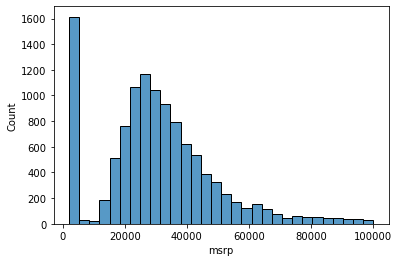

In [13]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 30)

In [14]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

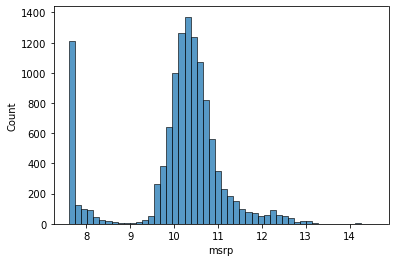

In [15]:
sns.histplot(price_logs, bins=50)

# Missing Values

In [16]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
df_shuffled = df.sample(frac=1,random_state=15)

In [19]:
df_val = df_shuffled.iloc[:n_val]
df_test = df_shuffled.iloc[n_val:n_val+n_test]
df_train = df_shuffled.iloc[n_val+n_test:]

In [20]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [21]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [22]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

In [23]:
# w_new = [w0] + w

In [24]:
def dot (xi,w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [25]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [26]:
linear_regression(xi)

NameError: name 'xi' is not defined

In [27]:
w0 = 4.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [28]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])

# Vector form

In [29]:
def linear_regression(X):
    return X.dot(w_new)

In [30]:
linear_regression(X)

array([ 9.38 , 10.552,  9.312])

In [31]:
def train_linear_regression(X, y):
    pass

# Training a linear regression model

In [32]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [231, 24, 1385],
    [234, 25, 1631],
    [256, 11, 86],
    [654, 54, 1385],
    [122, 25, 2031],
    [115, 31, 86],
]

X = np.array(X)

In [33]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
X = np.column_stack([ones, X])

In [35]:
y = [100, 250, 565, 242, 256 ,346, 676, 351, 333]

In [36]:
XTX = X.T.dot(X)

In [37]:
XTX_inv = np.linalg.inv(XTX)

In [38]:
XTX_inv

array([[ 8.07594971e-01, -8.42866269e-04, -1.03382665e-02,
        -1.89395611e-04],
       [-8.42866269e-04,  5.77389370e-06, -4.90830600e-05,
         5.27916041e-07],
       [-1.03382665e-02, -4.90830600e-05,  1.32559395e-03,
        -9.57277205e-06],
       [-1.89395611e-04,  5.27916041e-07, -9.57277205e-06,
         2.64034728e-07]])

In [39]:
w_full = XTX_inv.dot(X.T).dot(y)

In [40]:
w0 = w_full[0]
w = w_full[1:]
w0,w

(157.97815580821842, array([ 0.74685958,  1.5690502 , -0.04107171]))

In [41]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 2.310e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 2.340e+02, 2.500e+01, 1.631e+03],
       [1.000e+00, 2.560e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 6.540e+02, 5.400e+01, 1.385e+03],
       [1.000e+00, 1.220e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.150e+02, 3.100e+01, 8.600e+01]])

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [43]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

# Car price baseline model

In [75]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
1,toyota,tundra,2016,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,2031
2,gmc,yukon_xl,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,549
3,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
4,volkswagen,gli,2008,premium_unleaded_(required),200.0,4.0,manual,front_wheel_drive,4.0,performance,compact,sedan,29,20,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,buick,lucerne,2009,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
7146,mercedes-benz,cla-class,2017,premium_unleaded_(required),208.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617
7147,dodge,ram_150,1993,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,extended_cab_pickup,16,12,1851
7148,oldsmobile,eighty-eight,1999,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,17,26


In [76]:
num_cols = df_train.select_dtypes(exclude='object').columns

In [77]:
# df_train = df_train.fillna(0)

In [78]:
X_train = df_train[num_cols]

In [79]:
w0, w = train_linear_regression(X_train, y_train)

In [80]:
y_pred =  w0+ X_train.dot(w)

<AxesSubplot:ylabel='Count'>

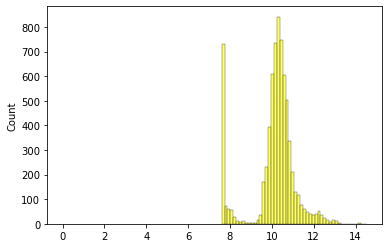

In [81]:
sns.histplot(y_pred, color='red', alpha= 0.6, bins=50)
sns.histplot(y_train,color='yellow', alpha= 0.6, bins=50)

# RMSE

In [82]:
def rmse(y, y_pred):
    se =  (y- y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [83]:
rmse(y_train, y_pred)

nan

# Validating the model

In [84]:
base = ['engine_hp','engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0+ X_train.dot(w)

In [85]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [86]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.7294664837942768

# Simple feature engineering

In [87]:
2017 - df_train.year

0        1
1        1
2        0
3        2
4        9
        ..
7145     8
7146     0
7147    24
7148    18
7149     0
Name: year, Length: 7150, dtype: int64

In [88]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [89]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.525005255607698

<AxesSubplot:ylabel='Count'>

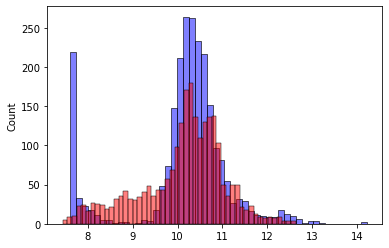

In [90]:
sns.histplot(y_val,color='blue', alpha= 0.5, bins=50)
sns.histplot(y_pred, color='red', alpha= 0.5, bins=50)


# Categorical variables

In [91]:
df_train.number_of_doors

0       4.0
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
7145    4.0
7146    4.0
7147    2.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [92]:
df_train.number_of_doors.unique()

array([ 4.,  2.,  3., nan])

In [93]:
for v in [2,3,4]:
  del df_train['num_doors_%s' %v]
#     = (df_train.number_of_doors == v).astype('int')

KeyError: 'num_doors_2'

In [94]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
1,toyota,tundra,2016,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,2031
2,gmc,yukon_xl,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,549
3,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
4,volkswagen,gli,2008,premium_unleaded_(required),200.0,4.0,manual,front_wheel_drive,4.0,performance,compact,sedan,29,20,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,buick,lucerne,2009,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
7146,mercedes-benz,cla-class,2017,premium_unleaded_(required),208.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617
7147,dodge,ram_150,1993,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,extended_cab_pickup,16,12,1851
7148,oldsmobile,eighty-eight,1999,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,17,26


In [95]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [96]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [97]:
X_train = prepare_X(df_train)

In [98]:
X_train

array([[170.,   4.,  38., ...,   0.,   0.,   1.],
       [381.,   8.,  17., ...,   0.,   0.,   1.],
       [355.,   8.,  23., ...,   0.,   0.,   1.],
       ...,
       [230.,   8.,  16., ...,   1.,   0.,   0.],
       [205.,   6.,  27., ...,   0.,   0.,   1.],
       [280.,   6.,  26., ...,   0.,   0.,   1.]])

In [100]:
makes = list(df.make.value_counts().head(5).index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [101]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
        
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [102]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.5103517555051044

In [103]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
1,toyota,tundra,2016,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,2031
2,gmc,yukon_xl,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,549
3,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
4,volkswagen,gli,2008,premium_unleaded_(required),200.0,4.0,manual,front_wheel_drive,4.0,performance,compact,sedan,29,20,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,buick,lucerne,2009,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
7146,mercedes-benz,cla-class,2017,premium_unleaded_(required),208.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617
7147,dodge,ram_150,1993,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,extended_cab_pickup,16,12,1851
7148,oldsmobile,eighty-eight,1999,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,17,26


In [104]:
df_train['market_category'].unique()

array([nan, 'flex_fuel,performance', 'hatchback,performance',
       'performance', 'diesel,luxury', 'luxury,performance',
       'exotic,factory_tuner,luxury,high-performance',
       'factory_tuner,performance', 'crossover', 'hatchback,diesel',
       'hatchback', 'luxury', 'crossover,luxury,hybrid', 'flex_fuel',
       'factory_tuner,luxury,high-performance', 'crossover,hatchback',
       'high-performance', 'crossover,luxury', 'exotic,high-performance',
       'crossover,luxury,performance', 'hybrid', 'flex_fuel,luxury',
       'factory_tuner,high-performance', 'hatchback,hybrid',
       'luxury,hybrid', 'crossover,hybrid', 'hatchback,luxury',
       'luxury,high-performance', 'exotic,luxury,high-performance',
       'crossover,flex_fuel', 'hatchback,factory_tuner,high-performance',
       'crossover,luxury,diesel', 'factory_tuner,luxury,performance',
       'diesel', 'hatchback,factory_tuner,performance',
       'crossover,factory_tuner,luxury,high-performance',
       'flex_fuel,

In [105]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    
#     'market_category',
    'vehicle_size', 'vehicle_style',
      'engine_cylinders'
]

In [106]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(5).index)

In [107]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [108]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

436.28613622247343

In [109]:
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w)
rmse(y_test, y_pred)

444.89485186011075

 # regularization
 

In [110]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])    
    
    XTX = X.T.dot(X)
    XTX += r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [111]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.46178730361925974

# Tuning the model

In [112]:
scores = {}
for r in [2, 1, 0.1, 0.01, 0.001, 0.0001, 0.02, 0.05, 0.03 ]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[r] = float("{:.5f}".format(score))

    print( r, w0, score)

2 5.372608940277116 0.4642048897083902
1 5.819651114593456 0.46280395050889117
0.1 6.5726110718305115 0.4618397055424926
0.01 6.694033228167057 0.46178730361925974
0.001 6.707024245534619 0.4617832114033466
0.0001 6.69854495222162 0.46178281450329234
0.02 6.679809756199005 0.46179212485365534
0.05 6.638279835364031 0.46180819967006337
0.03 6.665779524194415 0.46179722255502964


In [113]:
scores

{2: 0.4642,
 1: 0.4628,
 0.1: 0.46184,
 0.01: 0.46179,
 0.001: 0.46178,
 0.0001: 0.46178,
 0.02: 0.46179,
 0.05: 0.46181,
 0.03: 0.4618}

# Using the model

In [114]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [115]:
X_full_train = prepare_X(df_full_train)

In [116]:
y_full_train = np.concatenate([y_train,y_val])

In [117]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train)

In [118]:
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w)
rmse(y_test, y_pred)

0.4978742070768409

In [119]:
car = df_test.iloc[15].to_dict()
car

{'make': 'ford',
 'model': 'f-250',
 'year': 1998,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 220.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'manual',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 16,
 'city_mpg': 13,
 'popularity': 5657}

In [120]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,ford,f-250,1998,regular_unleaded,220.0,8.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,16,13,5657


In [121]:
X_small = prepare_X(df_small)

In [122]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

In [123]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')    
    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
            
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num
    return X

In [124]:
X_full_train = prepare_X(df_full_train)

In [125]:
y_full_train = np.concatenate([y_train,y_val])

In [126]:
X_full_train['price'] = y_full_train

<AxesSubplot:>

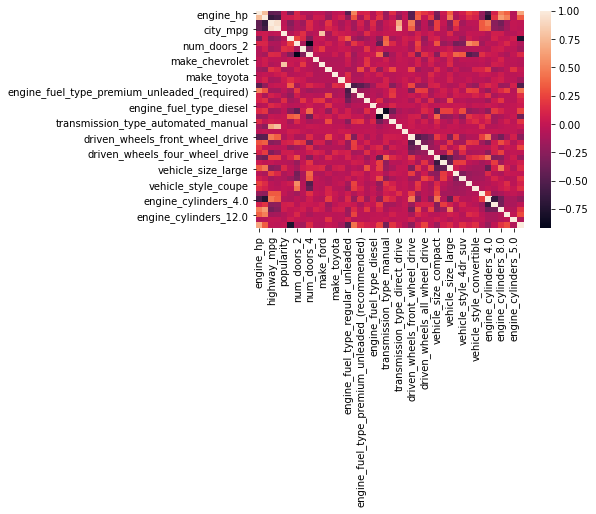

In [127]:
sns.heatmap(X_full_train.corr())

In [128]:
y_train

array([10.01864492, 10.43090477, 11.00236647, ...,  7.60140233,
        7.74975341, 10.59302824])

<AxesSubplot:ylabel='Count'>

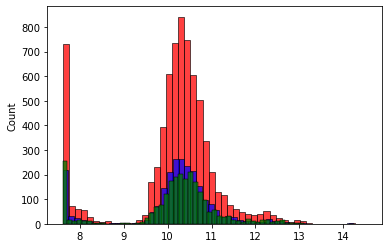

In [129]:
sns.histplot(y_train,bins=50, color='red')
sns.histplot(y_val, bins=50, color='blue')
sns.histplot(y_test,bins=50, color= 'green')

<AxesSubplot:ylabel='Count'>

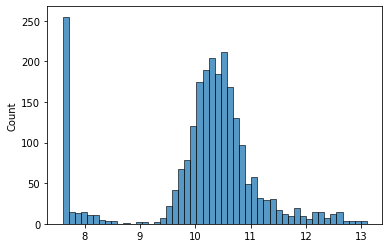

In [130]:
sns.histplot(y_test,bins=50)

<AxesSubplot:ylabel='Count'>

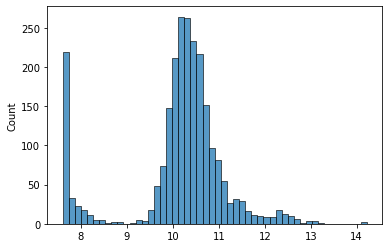

In [131]:
sns.histplot(y_val, bins=50)

In [141]:
def prepare_X(df):
    df = df.copy()
    df = df.fillna("0")
    features = base.copy()
#     print(df)
#     df['luxury'] = df.loc[df['market_category'].str.contains("luxury", case=False)]
#     df['crossover'] = df.loc[df['market_category'].str.contains("crossover", case=False)]
#     df['hybrid'] = df.loc[df['market_category'].str.contains("hybrid", case=False)]
#     df['performance'] = df.loc[df['market_category'].str.contains("performance", case=False)]
#     df['high-performance'] = df.loc[df['market_category'].str.contains("high-performance", case=False)]
#     features.append('luxury')
    print(df.loc[df['market_category'].str.contains("high-performance", case=False)])
    df['age'] = 2017 - df.year
    features.append('age')    
    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
            
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num
    return X

In [142]:
scores = {}
for r in [2, 1, 0.1, 0.01, 0.001, 0.0001, 0.02, 0.05, 0.03 ]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[r] = float("{:.5f}".format(score))

    print( r, w0, score)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [134]:
def funkcja (df):
    df = df.copy()
    x = df.isnull().sum()
    print(x)
#     df = df.fillna(0)
#     df.loc[df['market_category'].str.contains("high-performance", case=False)]
    return df

In [143]:
datafr = funkcja(df_train)
datafr

make                    0
model                   0
year                    0
engine_fuel_type        1
engine_hp              43
engine_cylinders       16
transmission_type       0
driven_wheels           0
number_of_doors         5
market_category      2244
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
1,toyota,tundra,2016,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,2031
2,gmc,yukon_xl,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,549
3,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
4,volkswagen,gli,2008,premium_unleaded_(required),200.0,4.0,manual,front_wheel_drive,4.0,performance,compact,sedan,29,20,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,buick,lucerne,2009,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
7146,mercedes-benz,cla-class,2017,premium_unleaded_(required),208.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617
7147,dodge,ram_150,1993,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,extended_cab_pickup,16,12,1851
7148,oldsmobile,eighty-eight,1999,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,17,26


In [136]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873
1,toyota,tundra,2016,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,2031
2,gmc,yukon_xl,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,549
3,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
4,volkswagen,gli,2008,premium_unleaded_(required),200.0,4.0,manual,front_wheel_drive,4.0,performance,compact,sedan,29,20,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,buick,lucerne,2009,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
7146,mercedes-benz,cla-class,2017,premium_unleaded_(required),208.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617
7147,dodge,ram_150,1993,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,extended_cab_pickup,16,12,1851
7148,oldsmobile,eighty-eight,1999,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,17,26


In [145]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [144]:
df.loc[df['market_category'].str.contains("luxury", case=False)].sample(15)

ValueError: Cannot mask with non-boolean array containing NA / NaN values